# Forward Kinematics

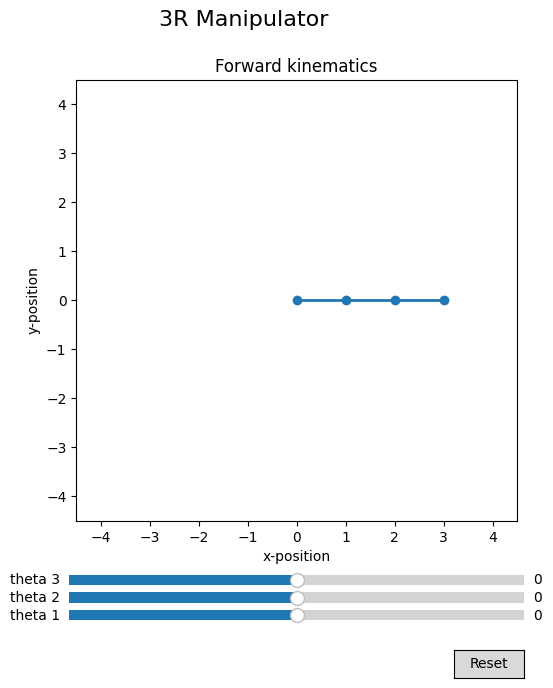

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
init_th1 = 0.0
init_th2 = 0.0
init_th3 = 0.0

c = np.cos
s = np.sin

l1 = 1
l2 = 1 
l3 = 1


class Manipulator:
    def __init__(self, l1, l2, l3):
        self.l1 = l1
        self.l2 = l2
        self.l3 = l3
        
    def forward3R(self, th1, th2, th3):
        th1 = np.radians(th1)
        th2 = np.radians(th2)
        th3 = np.radians(th3)
        P1 = np.array([self.l1*c(th1), self.l1*s(th1)])
        P2 = np.array([self.l1*c(th1)+self.l2*c(th1+th2),self.l1*s(th1)+self.l2*s(th1+th2)])
        P3 = np.array([self.l1*c(th1)+self.l2*c(th1+th2)+self.l3*c(th1+th2+th3),self.l1*s(th1)+self.l2*s(th1+th2)+self.l3*s(th1+th2+th3)])
        return P1, P2, P3
        


L = l1+l2+l3
man = Manipulator(l1,l2,l3)    
fig = plt.figure(figsize=(7, 7))
fig.suptitle('3R Manipulator', fontsize=16)
ax = fig.add_subplot(autoscale_on=False, xlim=(-1.5*L, 1.5*L), ylim=(-1.5*L, 1.5*L))
plt.title("Forward kinematics")
P1,P2,P3 = man.forward3R(init_th1,init_th2,init_th3)
line, = ax.plot([0,P1[0],P2[0],P3[0]], [0,P1[1],P2[1],P3[1]], 'o-', lw=2)
ax.set_xlabel('x-position')
ax.set_ylabel('y-position')
ax.set_aspect('equal')
fig.subplots_adjust(left=0.25, bottom=0.25)




axth1 = fig.add_axes([0.25, 0.1, 0.65, 0.03])
th1_slider = Slider(
    ax=axth1,
    label='theta 1',
    valmin=-360,
    valmax=360,
    valinit= init_th1,
)

axth2 = fig.add_axes([0.25, 0.125, 0.65, 0.03])
th2_slider = Slider(
    ax=axth2,
    label='theta 2',
    valmin=-360,
    valmax=360,
    valinit= init_th2,
)

axth3 = fig.add_axes([0.25, 0.15, 0.65, 0.03])
th3_slider = Slider(
    ax=axth3,
    label='theta 3',
    valmin=-360,
    valmax=360,
    valinit= init_th3,
)

# The function to be called anytime a slider's value changes
def update(val):
    P1,P2,P3 = man.forward3R(th1_slider.val, th2_slider.val, th3_slider.val)
    line.set_xdata([0,P1[0],P2[0],P3[0]])
    line.set_ydata([0,P1[1],P2[1],P3[1]])
    print(P1)
    fig.canvas.draw_idle()
    
th1_slider.on_changed(update)
th2_slider.on_changed(update)
th3_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')

def reset(event):
    th1_slider.reset()
    th2_slider.reset()
    th3_slider.reset()
button.on_clicked(reset)
    
    
plt.show()



### Inverse Kinematics based Trajectory Tracking

0

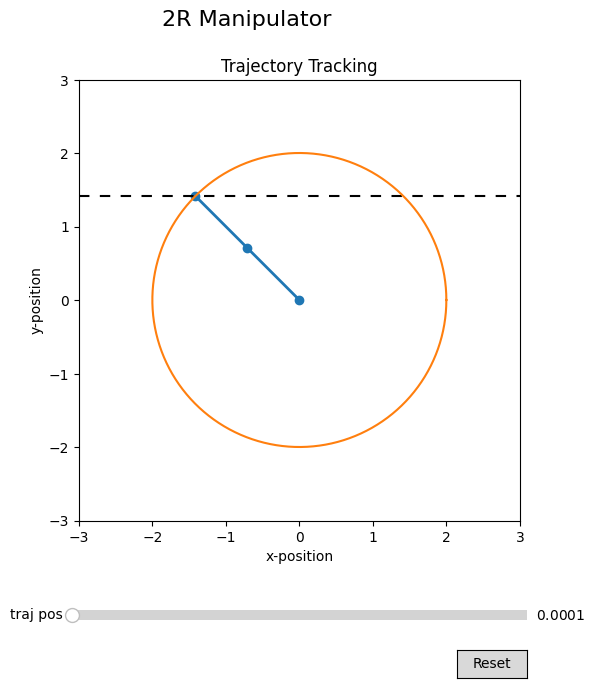

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

c = np.cos
s = np.sin

init_th1 = 135
init_th2 = 0

class Manipulator2R:
    def __init__(self, l1, l2):
        self.l1 = l1
        self.l2 = l2
        
    def forward2R(self, th1, th2):
        th1 = np.radians(th1)
        th2 = np.radians(th2)
        P1 = np.array([self.l1*c(th1), self.l1*s(th1)])
        P2 = np.array([self.l1*c(th1)+self.l2*c(th1+th2),self.l1*s(th1)+self.l2*s(th1+th2)])
        return P1, P2
    
    def inverse2R(self, x, y):
        th2 = np.arccos((x**2 + y**2 - self.l1**2 - self.l2**2) / 2*self.l1*self.l2)
        alpha = np.arctan2(y,x)
        beta = np.arctan2(self.l2*s(th2), self.l1 +self.l2*c(th2))
        th1 = alpha-beta
        return np.degrees(th1),np.degrees(th2)

    
l1 = 1
l2 = 1
L = l1+l2
man = Manipulator2R(l1,l2)    
fig = plt.figure(figsize=(7, 7))
fig.suptitle('2R Manipulator', fontsize=16)
ax = fig.add_subplot(autoscale_on=False, xlim=(-1.5*L, 1.5*L), ylim=(-1.5*L, 1.5*L))
plt.title("Trajectory Tracking")
P1,P2 = man.forward2R(init_th1,init_th2)
line, = ax.plot([0,P1[0],P2[0]], [0,P1[1],P2[1]], 'o-', lw=2)
ax.set_xlabel('x-position')
ax.set_ylabel('y-position')
ax.set_aspect('equal')
fig.subplots_adjust(left=0.25, bottom=0.25)



axpos = fig.add_axes([0.25, 0.1, 0.65, 0.03])
pos_slider = Slider(
    ax=axpos,
    label='traj pos',
    valmin=0.0001,
    valmax=0.9999,
    valinit= 0,
)

p1 = np.array([-np.sqrt(2),np.sqrt(2)])
p2 = np.array([np.sqrt(2),np.sqrt(2)])
def retpol(vn, p1, p2):
    return ((1-vn)*p1[0] + (vn)*p2[0]) , ((1-vn)*p1[1]+(vn)*p2[1])

#plot FWS and trajectory

ax.axline((0, np.sqrt(2)), slope=0, color="black", linestyle=(0, (5, 5)))
angle = np.linspace( 0 , 2 * np.pi , 150 ) 
 
radius = L
 
cx = radius * np.cos( angle ) 
cy = radius * np.sin( angle ) 

ax.plot(cx,cy)


# The function to be called anytime a slider's value changes
def update(val):
    #slider gives x,y
    vn = pos_slider.val
    x,y = retpol(vn, p1,p2)
    #print(x,y)
    #x,y gives th1, th2
    th1, th2 = man.inverse2R(x,y)
    P1,P2 = man.forward2R(th1, th2)
    line.set_xdata([0,P1[0],P2[0]])
    line.set_ydata([0,P1[1],P2[1]])
    fig.canvas.draw_idle()
    
pos_slider.on_changed(update)


# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')

def reset(event):
    pos_slider.reset()
    P1,P2 = man.forward2R(init_th1,init_th2)
    line.set_xdata([0,P1[0],P2[0]])
    line.set_ydata([0,P1[1],P2[1]])
button.on_clicked(reset)
    
    
#plt.show()




### Second Order Models

A standard form for a generic second-order model for a stable linear system is given  by

$$\lambda^2\frac{d^2x}{dt^2} + 2\zeta\lambda\frac{dx}{dt} + x = K u$$

where $y$ and $u$ are **deviation variables**.  The parameters have a generic interpretation that are commonly used to describe the qualitative characteristics of these systems.

| Parameter | Units | Description |
| :-: | :-: | :-: |
| $K$ | $\frac{\text{units of } x}{\text{units of } u}$ | Steady State Gain |
| $\lambda \gt 0$ | time | Time Constant |
| $\zeta \geq 0$ | dimensionless | Damping Factor |

The standard form assumes that a zero input (i.e, $u(t) = 0$) results in a zero response ($x(t) = 0$). In practice, the nominal or quiescent value of $x$ or $u$ may different from zero. In that case we would write

$$\lambda^2\frac{d^2x}{dt^2} + 2\zeta\lambda\frac{dx}{dt} + x - x_{ref} = K\left(u(t) - u_{ref}\right)$$

where $u_{ref}$ and $x_{ref}$ represent constant reference values.

### Overdamped ( $ \zeta > 1 $ )

For a system where the damping ratio, $ \zeta > 1 $, it exhibits an overdamped response. This response is typically slow and does not oscillate around the equilibrium position.

#### Mathematical Representation:
The response of the system, $ x(t) $, is represented by the equation:

$$ x(t) = x_{\text{ref}} + KU \left( 1 - \frac{\lambda_1 e^{-t / \lambda_1} - \lambda_2 e^{-t / \lambda_2}}{\lambda_1 - \lambda_2} \right) $$

Here, the parameters $ \lambda_1 $ and $ \lambda_2 $ are the time constants, determined by the characteristic equation of the system:

$$ \lambda^2 s^2 + 2 \zeta \lambda s + 1 = (\lambda_1 s + 1)(\lambda_2 s + 1) $$

To solve for $ \lambda_1 $ and $ \lambda_2 $, we factor the characteristic polynomial, obtaining:

$$ \lambda_1 = \frac{\lambda}{\zeta - \sqrt{\zeta^2 - 1}} $$
$$ \lambda_2 = \frac{\lambda}{\zeta + \sqrt{\zeta^2 - 1}} $$

#### Physical Interpretation:
- The overdamped response implies that the system is sluggish and will not exhibit any oscillatory behavior.
- The time constants, $ \lambda_1 $ and $ \lambda_2 $, indicate the rate at which the corresponding exponential terms in the response decay.
- The larger the value of $ \zeta $, the more “overdamped” the system is, implying a slower response with no oscillations.

#### Summary:
In overdamped systems, the response is characterized by the absence of oscillations and a relatively slow return to the equilibrium or desired set point, defined by $ x_{\text{ref}} $. The time constants, $ \lambda_1 $ and $ \lambda_2 $, obtained from the characteristic equation, give insight into the decay rates of the response components, with their difference being governed by the damping ratio, $ \zeta $.



In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact


def overdamped(K, lam, zeta):
    t = np.linspace(0,20)
    lam_1 = lam/(zeta - np.sqrt(zeta**2 - 1))
    lam_2 = lam/(zeta + np.sqrt(zeta**2 - 1))

    x = K*(1 - ((lam_1*np.exp(-t/lam_1) - lam_2*np.exp(-t/lam_2))/(lam_1 - lam_2)))
    plt.plot(t,x)
    plt.grid()
    
interact(overdamped, K=(0.5,2), lam=(0.5,2), zeta=(1.01,2))

interactive(children=(FloatSlider(value=1.25, description='K', max=2.0, min=0.5), FloatSlider(value=1.25, desc…

<function __main__.overdamped(K, lam, zeta)>

### Critically Damped ($ \zeta = 1 $)

In a critically damped system, the damping is just enough to prevent oscillations and the system reaches the steady state in the minimum possible time. A critically damped response is often ideal in control systems to avoid overshoot while still achieving fast response times.

#### Mathematical Representation:
The response of the system, $ x(t) $, is represented by the equation:

$$ x(t) = x_{\text{ref}} + KU \left[1 - \left(1 + \frac{t}{\lambda}\right)e^{-t/\lambda}\right] $$

In this equation:
- $ x(t) $ represents the response of the system at time $ t $.
- $ x_{\text{ref}} $ is the reference or initial value of the response.
- $ KU $ is a term representing the input’s influence on the system.
- $ \lambda $ is the characteristic time constant of the system determining the speed of response.

#### Physical Interpretation:
- A critically damped response allows the system to reach the steady state in the shortest time without oscillations.
- The term $ 1 - \left(1 + \frac{t}{\lambda}\right)e^{-t/\lambda} $ represents the transient response of the system, which decays over time.
- As $ t $ approaches infinity, the transient term goes to zero, and the response $ x(t) $ approaches its steady-state value of $ x_{\text{ref}} + KU $.

#### Summary:
In critically damped systems, the response is characterized by a fast return to the equilibrium or desired set point, $ x_{\text{ref}} $, without oscillations. The characteristic time constant, $ \lambda $, determines the speed at which the system responds to changes, making it a crucial parameter in the design and analysis of such systems.


In [14]:
def criticallydamped(K, lam):
    t = np.linspace(0,20)
    x = K*(1 - (1 + t/lam)*np.exp(-t/lam))
    plt.plot(t,x)
    plt.grid()
    
interact(criticallydamped, K=(0.5,2), lam=(0.5,2))

interactive(children=(FloatSlider(value=1.25, description='K', max=2.0, min=0.5), FloatSlider(value=1.25, desc…

<function __main__.criticallydamped(K, lam)>

### Underdamped ($ \zeta < 1 $)

An underdamped system is characterized by oscillations around the equilibrium or set point before eventually stabilizing. This is due to the damping being insufficient to prevent the oscillatory behavior. The damping ratio, $ \zeta $, being less than one implies that the system will exhibit these oscillatory transients.

#### Mathematical Representation:
The response of the system, $ x(t) $, can be represented as follows:

$$ x(t) = x_{\text{ref}} + KU \left( 1 - e^{-\zeta \lambda t} \left( \cos(\omega_d t) + \frac{\zeta}{\sqrt{1 - \zeta^2}} \sin(\omega_d t) \right) \right) $$

where $ \omega_d = \lambda \sqrt{1 - \zeta^2} $ is the damped angular frequency.

#### Physical Interpretation:
- The underdamped response implies that the system will oscillate around the equilibrium position before eventually stabilizing, caused by insufficient damping.
- The oscillation frequency is determined by $ \omega_d $, which is dependent on the damping ratio $ \zeta $ and the characteristic time constant $ \lambda $.
- The amplitude of the oscillations and the rate at which they decay are also dependent on the values of $ \zeta $ and $ \lambda $.

#### Summary:
In underdamped systems, the response is characterized by oscillatory transients before reaching the equilibrium or desired set point, defined by $ x_{\text{ref}} $. The damping ratio, $ \zeta $, and the characteristic time constant, $ \lambda $, are critical parameters influencing the frequency and decay rate of the oscillations, providing insights into the dynamic behavior of the system.


In [15]:
def underdamped(K, lam, zeta):
    t = np.linspace(0,20)
    c = np.cos(np.sqrt(1-zeta**2)*t/lam)
    s = np.sin(np.sqrt(1-zeta**2)*t/lam)
    
    y = K*(1 - np.exp(-zeta*t/lam)*(c + zeta*s/np.sqrt(1-zeta**2)))
    plt.plot(t,y)
    plt.grid()
    
interact(underdamped, K=(0.5,3), lam=(0.5,3), zeta=(0,0.999))

interactive(children=(FloatSlider(value=1.75, description='K', max=3.0, min=0.5), FloatSlider(value=1.75, desc…

<function __main__.underdamped(K, lam, zeta)>